# importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the data into a pandas DataFrame

In [2]:
data = pd.read_csv('Wine quality classification.csv')

# Exploratory Data Analysis (EDA) 

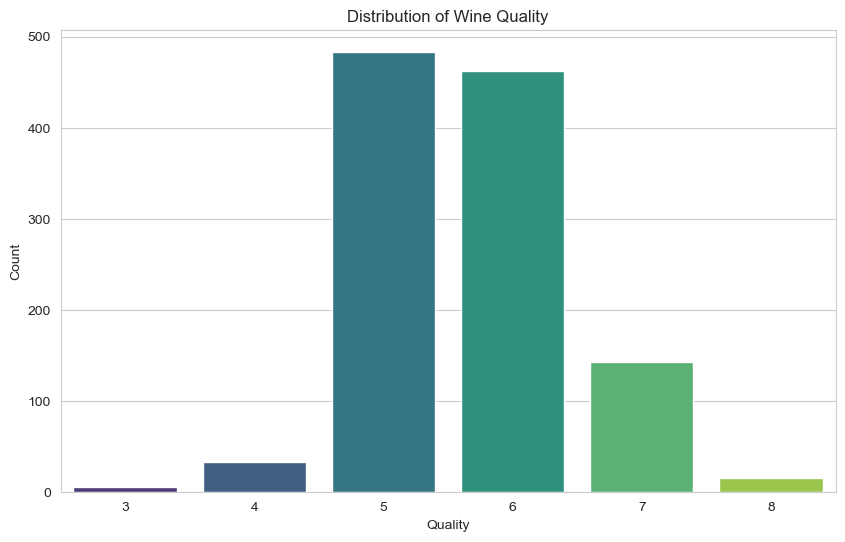

In [3]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(data=data, x='quality', palette='viridis')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

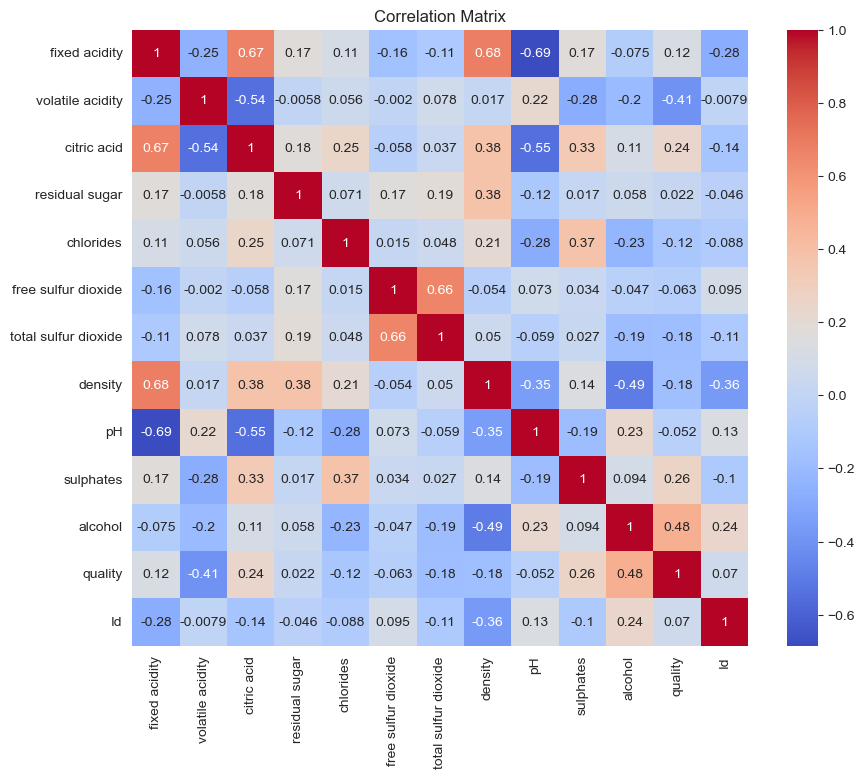

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Data Preprocessing
X = data.drop(['quality', 'Id'], axis=1)
y = data['quality']

# Scale the feature data

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [8]:
model = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [9]:
y_pred = model.predict(X_test)

# Classification Report Visualization

In [10]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

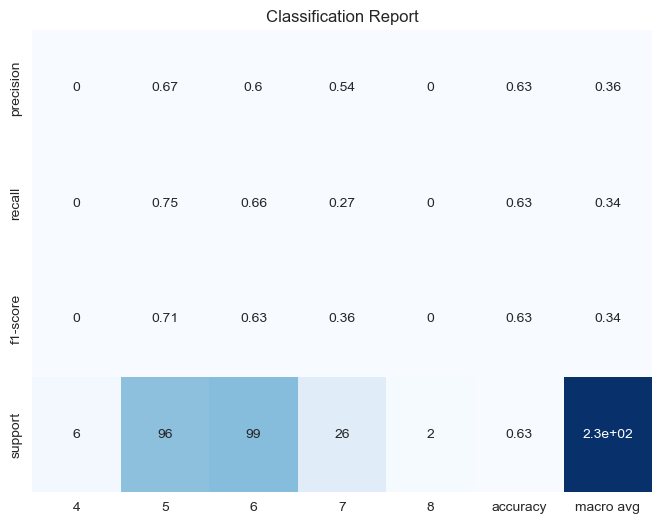

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report')
plt.show()

# Model Evaluation

In [12]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.67      0.75      0.71        96
           6       0.60      0.66      0.63        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.36      0.34      0.34       229
weighted avg       0.60      0.63      0.61       229

